In [1]:
!git clone https://git.wur.nl/koots006/msc-course-machine-learning.git data
!mv data/modules/regsubset.py .

Cloning into 'data'...
remote: Enumerating objects: 497, done.
remote: Counting objects: 100% (451/451), done.
remote: Compressing objects: 100% (445/445), done.
remote: Total 497 (delta 4), reused 451 (delta 4), pack-reused 46
Receiving objects: 100% (497/497), 36.40 MiB | 14.34 MiB/s, done.
Resolving deltas: 100% (5/5), done.


## Support code

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, accuracy_score

from regsubset import OLS, exhaustive_search, forward_search, backward_search

## Exercise 6.8

a,b) Here, I choose the coefficients randomly, only avoiding to set them to zero or to introduce very large differences in scale.

In [3]:
n = 100
beta = [17, np.exp(1), np.pi, np.log(2)]

np.random.seed(13)
X = np.random.randn(n)
e = np.random.randn(n)

y = beta[0] + beta[1]*X + beta[2]*(X**2) + beta[3]*(X**3) + e

c)

In [4]:
# Create predictor matrix
p = 10
X_new = np.zeros((n,p))
for ex in range(p):
    X_new[:,ex] = X**(ex+1)

X_new_df = pd.DataFrame(X_new,columns=['X^' + str(i+1) for i in range(p)])

lm = OLS(fit_intercept=True)
lm_exhaustive = exhaustive_search(lm, X_new_df, y, nvmax=len(X_new_df.columns))

calculating scores for 'nfeat=1'...
calculating scores for 'nfeat=2'...
calculating scores for 'nfeat=3'...
calculating scores for 'nfeat=4'...
calculating scores for 'nfeat=5'...
calculating scores for 'nfeat=6'...
calculating scores for 'nfeat=7'...
calculating scores for 'nfeat=8'...
calculating scores for 'nfeat=9'...
calculating scores for 'nfeat=10'...
done


    n          rss         aic         bic  rsquared  rsquared_adj
0   1  1496.130211  558.334407  563.544748  0.581304      0.577032
1   2   160.870571  337.330701  345.146212  0.954980      0.954052
2   3    65.429043  249.367313  259.787993  0.981690      0.981117
3   4    63.460388  248.312278  261.338129  0.982240      0.981493
4   5    60.278214  245.167762  260.798783  0.983131      0.982234
5   6    58.432879  244.058562  262.294753  0.983647      0.982592
6   7    57.746517  244.876991  265.718353  0.983840      0.982610
7   8    57.350560  246.188949  269.635480  0.983950      0.982539
8   9    57.036351  247.639568  273.691270  0.984038      0.982442
9  10    57.036349  249.639564  278.296436  0.984038      0.982245


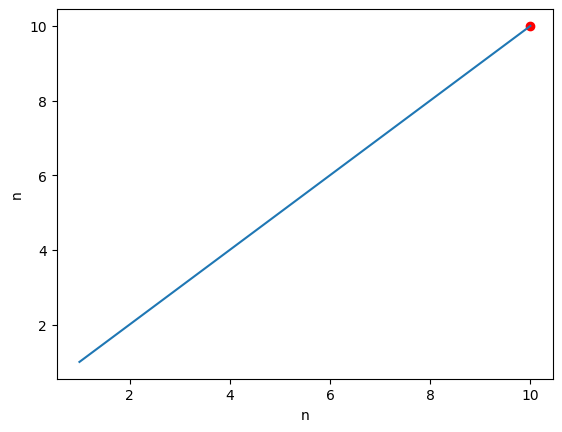

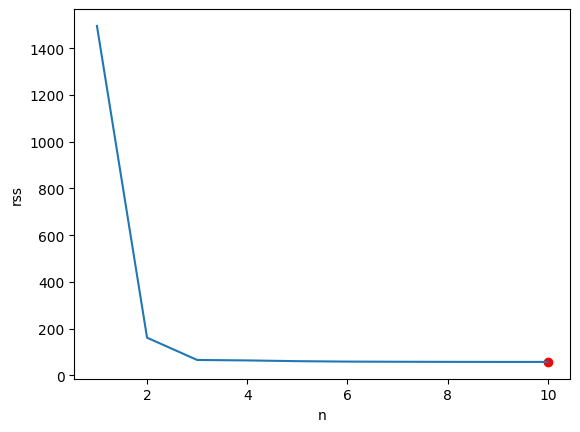

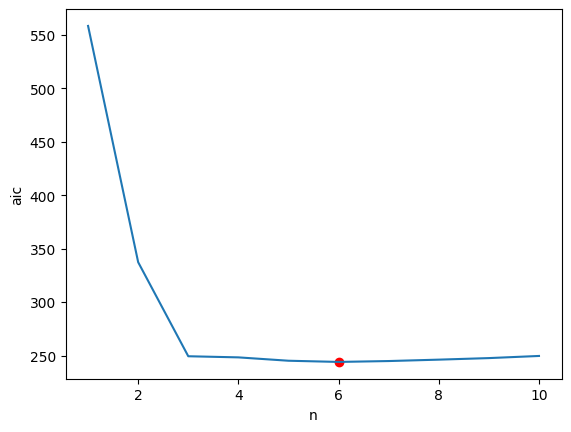

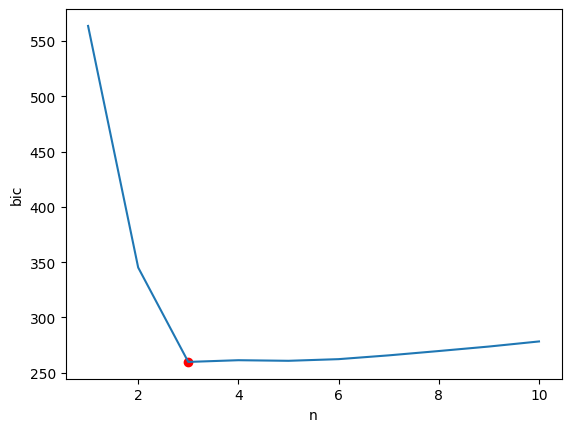

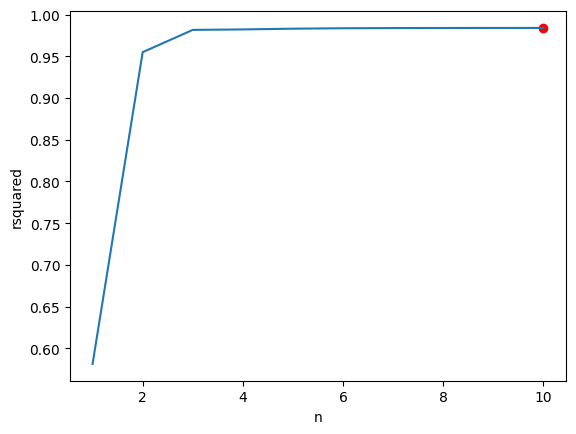

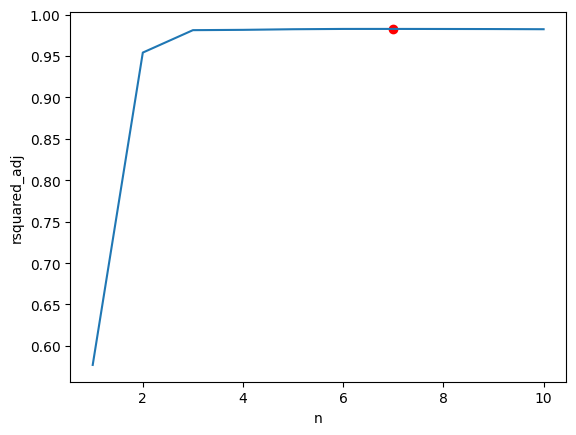

In [5]:
print(pd.DataFrame.from_dict(lm_exhaustive.metrics))
lm_exhaustive.plot()

According to $AIC$ a subset of 6 features is optimal, $BIC$ selects a subset of 3 features and $R^{2}_{adjusted}$ one of 7 features. It is clear that most metrics do not change much after selecting 3 features. The actual features selected are:

In [6]:
print("AIC:\n", lm_exhaustive.get_model(n=6), '\n\n\n')
print("BIC:\n", lm_exhaustive.get_model(n=3), '\n\n\n')
print("R2_adj:\n", lm_exhaustive.get_model(n=7), '\n\n\n')

AIC:
                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     932.4
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           9.53e-81
Time:                        07:28:02   Log-Likelihood:                -115.03
No. Observations:                 100   AIC:                             244.1
Df Residuals:                      93   BIC:                             262.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.5614      0.169     98.058   

The $AIC$ finds the three features actually used but adds $X^{4}$, $X^{6}$ and $X^{8}$; $R^{2}_{adjusted}$ adds $X^{4}$, $X^{5}$, $X^{6}$ and $X^{10}$; and $BIC$ finds the actual optimal subset. The coefficients found are close, but not all identical, to the actual values 17, 2.7178, 3.1415 and 0.6932.

d)

Forward:
    n          rss         aic         bic  rsquared  rsquared_adj
0   1  1496.130211  558.334407  563.544748  0.581304      0.577032
1   2   247.288472  380.326244  388.141754  0.930796      0.929369
2   3    65.429043  249.367313  259.787993  0.981690      0.981117
3   4    63.460388  248.312278  261.338129  0.982240      0.981493
4   5    61.853719  247.747910  263.378931  0.982690      0.981769
5   6    58.432992  244.058753  262.294945  0.983647      0.982592
6   7    57.746517  244.876991  265.718353  0.983840      0.982610
7   8    57.350560  246.188949  269.635480  0.983950      0.982539
8   9    57.036351  247.639568  273.691270  0.984038      0.982442
9  10    57.036349  249.639564  278.296436  0.984038      0.982245


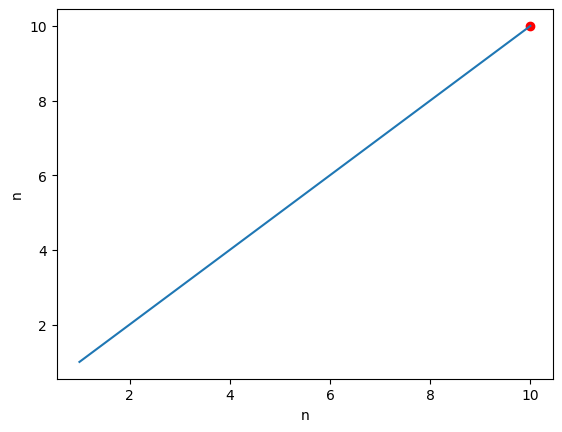

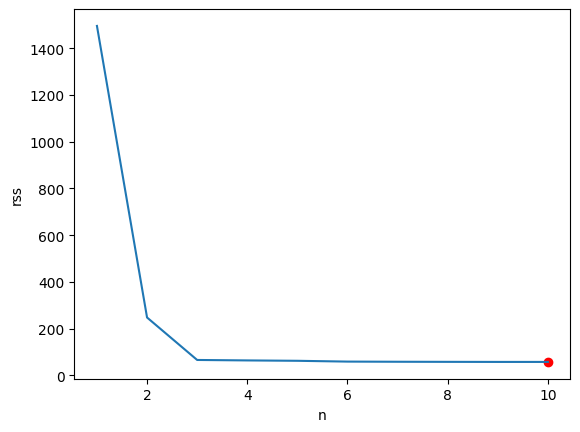

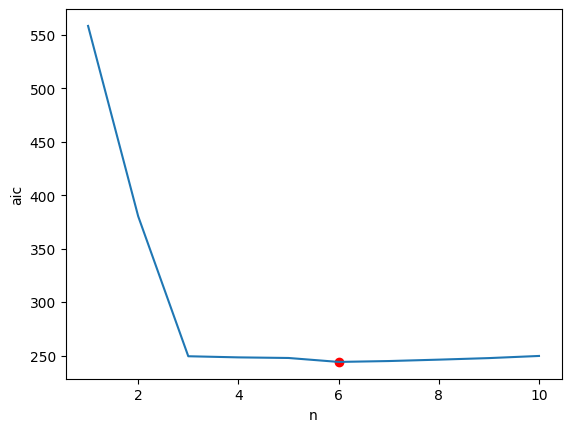

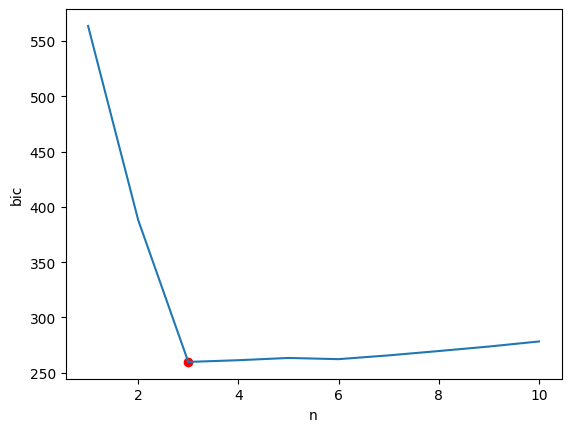

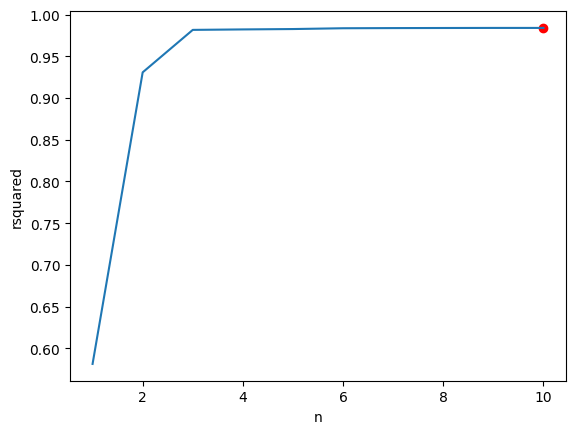

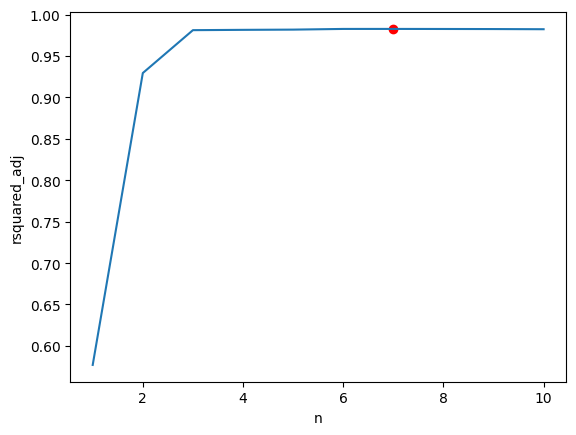

Backward:
    n          rss         aic         bic  rsquared  rsquared_adj
0   1  1497.726512  558.441046  563.651386  0.580858      0.576581
1   2   160.870571  337.330701  345.146212  0.954980      0.954052
2   3    65.429043  249.367313  259.787993  0.981690      0.981117
3   4    64.140757  249.378688  262.404539  0.982050      0.981294
4   5    60.278214  245.167762  260.798783  0.983131      0.982234
5   6    58.432992  244.058753  262.294945  0.983647      0.982592
6   7    57.746517  244.876991  265.718353  0.983840      0.982610
7   8    57.350560  246.188949  269.635480  0.983950      0.982539
8   9    57.036351  247.639568  273.691270  0.984038      0.982442
9  10    57.036349  249.639564  278.296436  0.984038      0.982245


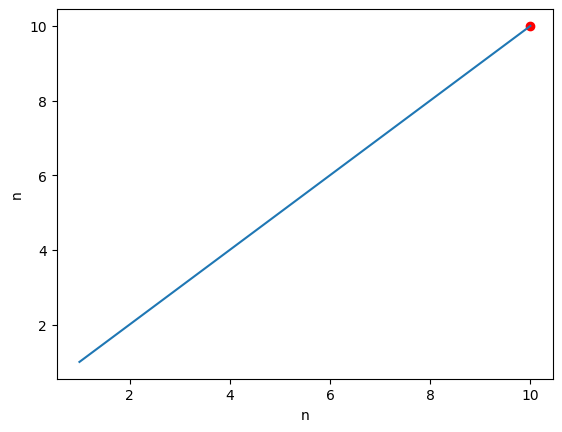

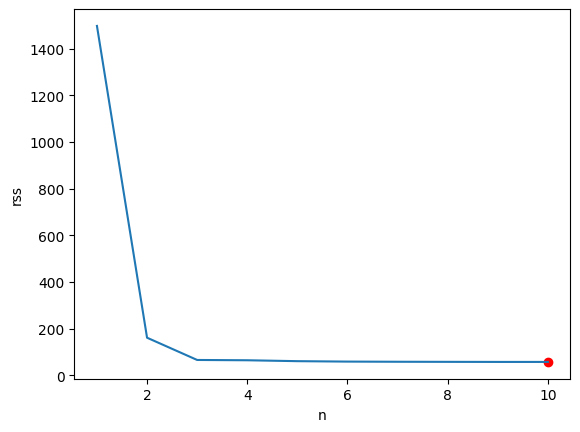

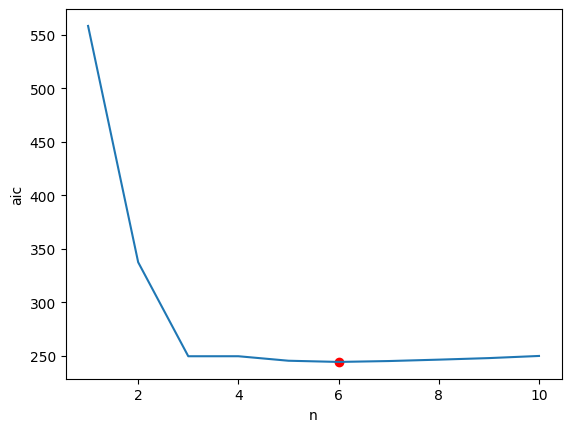

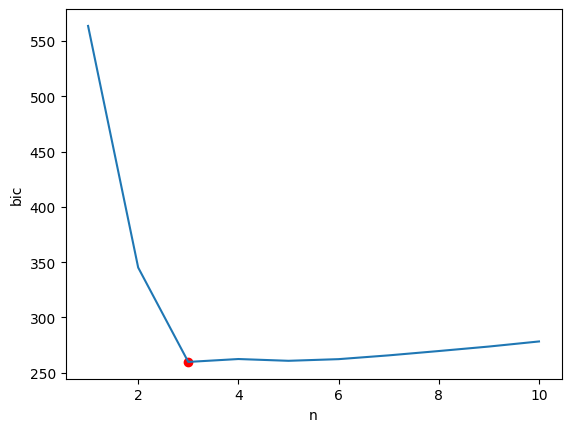

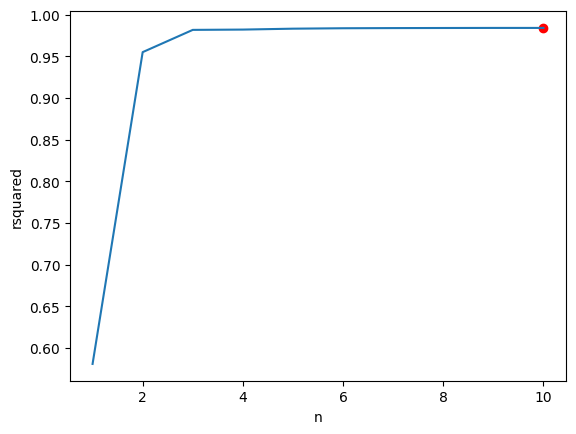

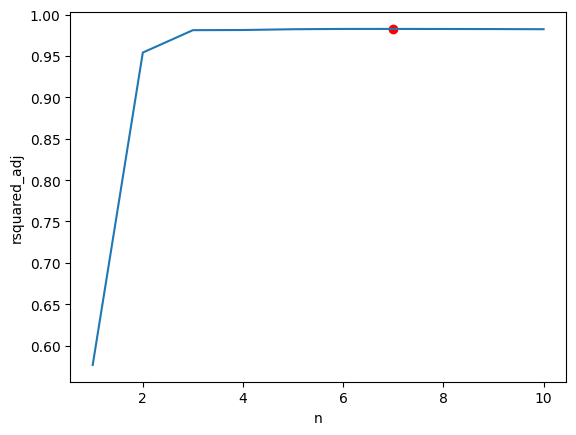

In [7]:
lm = OLS(fit_intercept=True)
lm_forward = forward_search(lm, X_new_df, y, nvmax=len(X_new_df.columns))

lm = OLS(fit_intercept=True)
lm_backward = backward_search(lm, X_new_df, y, nvmin=1)

print("Forward:")
print(pd.DataFrame.from_dict(lm_forward.metrics))
lm_forward.plot()

print("Backward:")
print(pd.DataFrame.from_dict(lm_backward.metrics))
lm_backward.plot()

Apparently, forward and backward selection mostly yield the same optimal subset sizes as exhaustive search for this problem. You can play with the random seed used in a) to see whether you can find situations where this does not hold. Did forward and backward selection also select the same features?

In [8]:
print("Fwd, Cp, AIC:", lm_forward.get_model(n=6))
print("Fwd, BIC:", lm_forward.get_model(n=3))
print("Fwd, R2_adj:", lm_forward.get_model(n=7))

print("Bwd, Cp, AIC:", lm_backward.get_model(n=6))
print("Bwd, BIC:", lm_backward.get_model(n=3))
print("Bwd, R2_adj:", lm_backward.get_model(n=7))

Fwd, Cp, AIC:                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.984
Model:                            OLS   Adj. R-squared:                  0.983
Method:                 Least Squares   F-statistic:                     932.4
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           9.53e-81
Time:                        07:28:09   Log-Likelihood:                -115.03
No. Observations:                 100   AIC:                             244.1
Df Residuals:                      93   BIC:                             262.3
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.5763      0.165    10

It seems that for $C_p$ and $AIC$, both forward and backwards selection picked $X^{10}$ rather than $X^{8}$ for exhaustive search. Both choices yield (almost) exactly the same AIC, though with different coefficients for the features.

e)

In [9]:
# Apply scaling and convert to DataFrame
scaler = StandardScaler()
X_new = scaler.fit_transform(X_new)

lambdas = 10 ** np.linspace(3,-3,50)

mean_scores = np.zeros(len(lambdas))
std_scores = np.zeros(len(lambdas))

for i, lambda_ in enumerate(lambdas):
    cv = cross_val_score(
      Lasso(lambda_, max_iter=10000),
      X_new, y, cv=10, scoring='neg_mean_squared_error'
    )
    mean_scores[i] = cv.mean()
    std_scores[i] = cv.std()

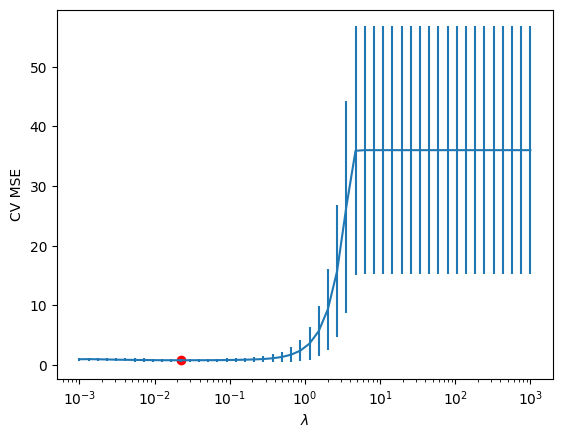

In [10]:
plt.errorbar(x=lambdas, y=-mean_scores, yerr=std_scores)
mn, opt = np.min(-mean_scores), np.argmin(-mean_scores)
plt.scatter(lambdas[opt],mn,c='red')
plt.xscale("log")
plt.xlabel('$\lambda$')
plt.ylabel('CV MSE')
plt.show()

In [11]:
print("Minimum MSE of {} at lambda: {} (index {})".format(mn,lambdas[opt],opt))

lasso = Lasso(max_iter=10000) # Setting max_iter prevents ConvergenceWarning
lasso.set_params(alpha=lambdas[opt])
lasso.fit(X_new, y)

print("Coefficients:")
print(lasso.intercept_,lasso.coef_)
pred = lasso.predict(X_new)
print("MSE on training set: ",mean_squared_error(y,pred))

Minimum MSE of 0.7350324981957831 at lambda: 0.022229964825261957 (index 38)
Coefficients:
19.88866862234842 [2.510185   3.40842997 1.82477962 0.         0.         0.
 0.         0.         0.         0.21227173]
MSE on training set:  0.635564413942045


The estimated values are not identical to the actual parameters used (17, 2.7178, 3.1415 and 0.6932), but most other features are deselected except the least one.

f)

calculating scores for 'nfeat=1'...
calculating scores for 'nfeat=2'...
calculating scores for 'nfeat=3'...
calculating scores for 'nfeat=4'...
calculating scores for 'nfeat=5'...
calculating scores for 'nfeat=6'...
calculating scores for 'nfeat=7'...
calculating scores for 'nfeat=8'...
calculating scores for 'nfeat=9'...
calculating scores for 'nfeat=10'...
done
    n        rss         aic         bic  rsquared  rsquared_adj
0   1  65.442619  245.388060  250.598400  0.988138      0.988017
1   2  64.599229  246.090935  253.906446  0.988291      0.988050
2   3  62.486903  244.766386  255.187067  0.988674      0.988320
3   4  60.340692  243.271358  256.297209  0.989063      0.988602
4   5  58.394488  241.992837  257.623858  0.989416      0.988853
5   6  58.107156  243.499570  261.735761  0.989468      0.988788
6   7  57.930597  245.195257  266.036618  0.989500      0.988701
7   8  57.350560  246.188949  269.635480  0.989605      0.988691
8   9  57.036351  247.639568  273.691270  0.98966

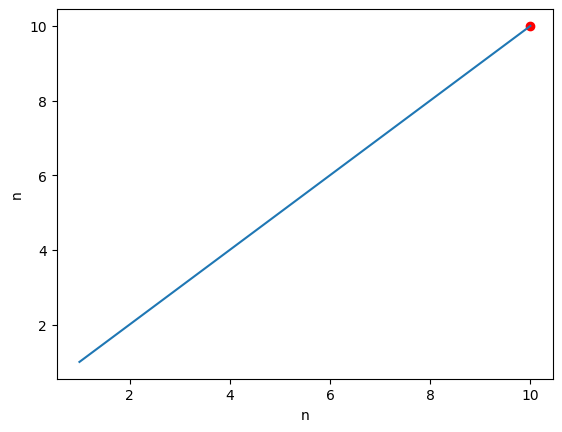

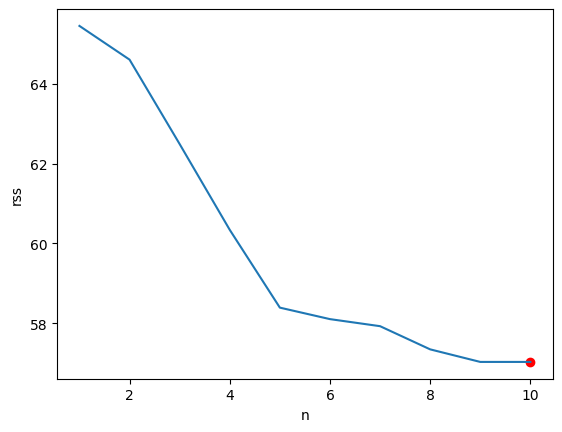

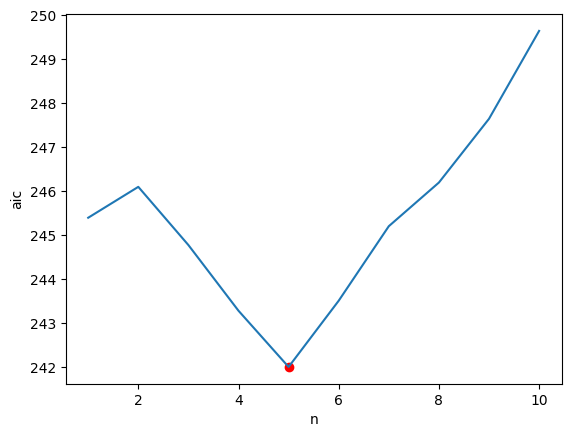

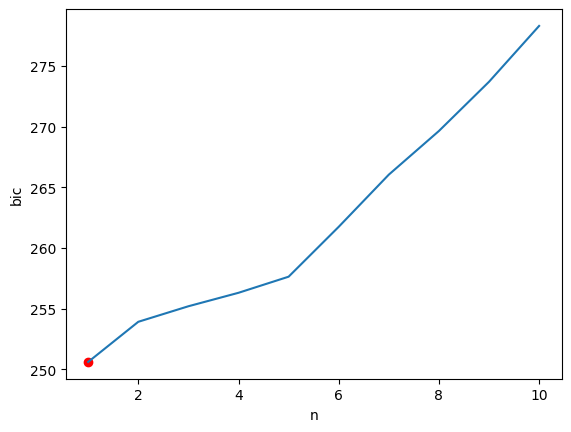

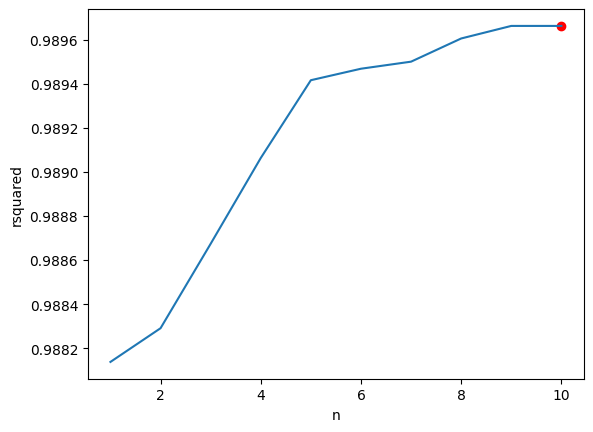

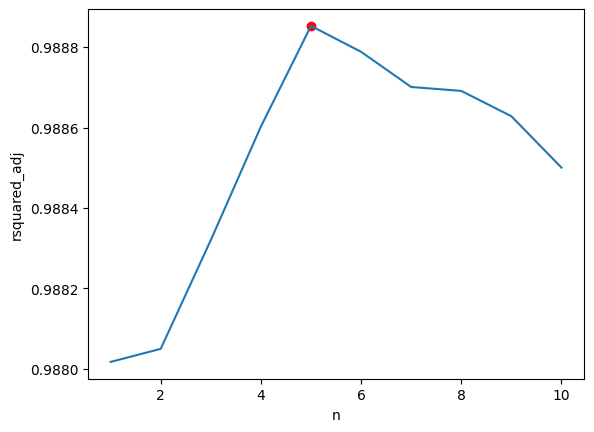

AIC:                             OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                     1757.
Date:                Sat, 17 Feb 2024   Prob (F-statistic):           3.58e-91
Time:                        07:28:17   Log-Likelihood:                -115.00
No. Observations:                 100   AIC:                             242.0
Df Residuals:                      94   BIC:                             257.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     16.1563      0.164     98.501    

In [12]:
y = 17 + np.exp(2)*(X_new[:,6]) + e

lm = OLS(fit_intercept=True)
lm_exhaustive = exhaustive_search(lm, X_new_df, y, nvmax=len(X_new_df.columns))
print(pd.DataFrame.from_dict(lm_exhaustive.metrics))
lm_exhaustive.plot()

print("AIC:", lm_exhaustive.get_model(n=5))
print("BIC:", lm_exhaustive.get_model(n=1))
print("R2_adj:", lm_exhaustive.get_model(n=5))

Exhaustive subset selection here finds the correct features using the $BIC$, but the other metrics result in finding four other features.

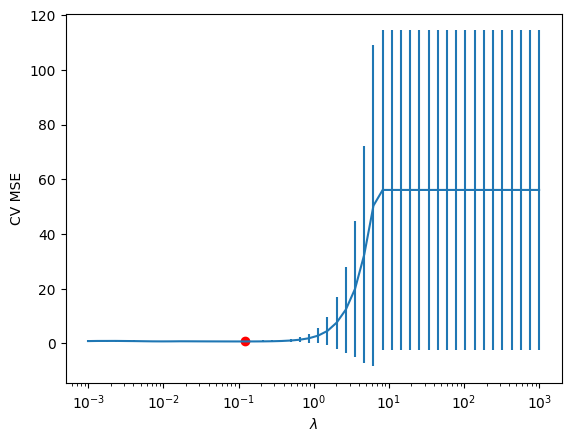

Minimum MSE of 0.7465019267736167 at lambda: 0.1206792640639329 (index 32)
Coefficients:
16.854484391519115 [0.         0.         0.         0.         0.21838221 0.
 7.04706243 0.         0.         0.        ]


In [13]:
lambdas = 10 ** np.linspace(3,-3,50)

mean_scores = np.zeros(len(lambdas))
std_scores = np.zeros(len(lambdas))

for i, lambda_ in enumerate(lambdas):
    cv = cross_val_score(
      Lasso(lambda_, max_iter=10000),
      X_new, y, cv=10, scoring='neg_mean_squared_error'
    )
    mean_scores[i] = cv.mean()
    std_scores[i] = cv.std()

plt.errorbar(x=lambdas, y=-mean_scores, yerr=std_scores)
mn, opt = np.min(-mean_scores), np.argmin(-mean_scores)
plt.scatter(lambdas[opt],mn,c='red')
plt.xscale("log")
plt.xlabel('$\lambda$')
plt.ylabel('CV MSE')
plt.show()

print("Minimum MSE of {} at lambda: {} (index {})".format(mn,lambdas[opt],opt))

lasso = Lasso(max_iter=10000)
lasso.set_params(alpha=lambdas[opt])
lasso.fit(X_new, y)

print("Coefficients:")
print(lasso.intercept_,lasso.coef_)

When $\lambda$ is optimized using cross-validation, the lasso finds $X^{7}$ as a useful feature, with approximately the correct coefficient, but also includes $X^{5}$. If we manually increase $\lambda$, we can find a solution using only $X^{7}$:

In [14]:
lasso = Lasso(max_iter=10000) # Setting max_iter prevents ConvergenceWarning
lasso.set_params(alpha=1)
lasso.fit(X_new, y)

print("Coefficients:")
print(lasso.intercept_,lasso.coef_)

Coefficients:
16.854484391519115 [0.         0.         0.         0.         0.         0.
 6.38351955 0.         0.         0.        ]


## Exercise 6.10

a) Here I just simply generate normally distributed values for both X and the coefficients - this can of course be done in more fancy ways. I chose to set 13 coefficients to non-zero values.

In [15]:
np.random.seed(42)
p = 20
n = 1000

X = np.random.randn(n,p)
beta = np.random.randn(p)
beta[[2,4,6,10,12,16,18]] = 0

noise = np.random.randn(n)

y = np.dot(X,beta) + noise

# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_df = pd.DataFrame(X)

b)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X_df, y, test_size=0.9, random_state=13)

c,d) Exhaustive feature selection takes a very long time on this dataset, so I use forward selection:

In [17]:
lm = OLS(fit_intercept=True)
lm_forward = forward_search(lm, X_train, y_train, nvmax=len(X_train.columns))

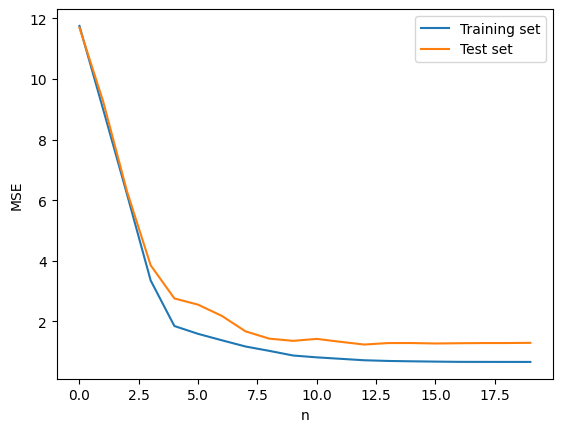

In [18]:
trn_errors, tst_errors = [], []
for n in lm_forward.ns:
    model = lm_forward.models[n - 1]
    subset = lm_forward.subsets[n - 1]

    y_pred_trn = model.predict(X_train, subset)
    error = ((y_train - y_pred_trn) ** 2).mean()
    trn_errors.append(error)

    y_pred_tst = model.predict(X_test, subset)
    error = ((y_test - y_pred_tst) ** 2).mean()
    tst_errors.append(error)

plt.plot(range(20),trn_errors)
plt.plot(range(20),tst_errors)
plt.legend(['Training set','Test set'])
plt.xlabel('n')
plt.ylabel('MSE')
plt.show()

e)

In [19]:
print("Minimum test set MSE = {} at {} features".format(np.min(tst_errors), np.argmin(tst_errors)+1))

Minimum test set MSE = 1.2364469950993509 at 13 features


This nicely corresponds to the 13 features I left non-zero in data generation.

f)

In [20]:
coefs = lm_forward.get_model(n=13).coefs()
intercept = coefs[0]
print(intercept)
sorted(coefs[1:], key=lambda tup: tup[0])

('intercept', 0.028109733383882826)


[(0, 0.3802244951931257),
 (1, 0.24935399354328874),
 (3, 0.4810599498513467),
 (5, -0.5118123167251212),
 (7, 1.3749286591527723),
 (8, -0.25200983784186287),
 (9, 2.0205762485032777),
 (10, -0.283331034544247),
 (11, 0.45510695148415137),
 (13, -1.0500925986543614),
 (14, 0.5478360166439913),
 (17, -1.479112506511163),
 (19, 1.6338600979430407)]

The coefficients found are close, but not identical to the true ones.

g)

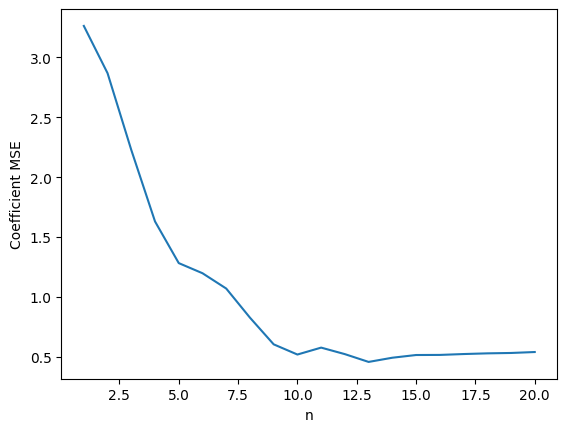

In [21]:
diff = np.zeros(p)

for i in range(p):
    coefs = sorted(lm_forward.models[i].coefs()[1:], key=lambda x: x[0])
    idx, pars = list(zip(*coefs))
    npars = np.zeros(p)
    npars[np.array(idx)] = np.array(pars)
    diff[i] = np.sqrt(np.sum((beta - npars) ** 2))

plt.plot(range(1,p+1),diff)
plt.xlabel('n')
plt.ylabel('Coefficient MSE')
plt.show()

Apparently the estimated coefficients are closest to the true ones for a subset of 13 features, although for 10-20 features the difference is not large.

## OPTIONAL: Exercise 6.9

a)

In [22]:
College = pd.read_csv(
  './data/islr_data/College.csv',
  dtype={
    'Private': str, # Boolean
    'Apps': float,
    'Accept': float,
    'Enroll': float,
    'Top10perc': float,
    'Top25perc': float,
    'F.Undergrad': float,
    'P.Undergrad': float,
    'Outstate': float,
    'Room.Board': float,
    'Books': float,
    'Personal': float,
    'PhD': float,
    'Terminal': float,
    'S.F.Ratio': float,
    'perc.alumni': float,
    'Expend': float,
    'Grad.Rate': float
  }
)

College.head()

#Remove the names
College = College.iloc[: , 1:]

# We need to convert the categorical predictors into a dummy
College = pd.get_dummies(College, columns=['Private'])

# The feature is boolean, so we can delete the second column
College = College.drop('Private_No', axis=1)

y = College['Apps']              # We want to predict `Apps` with all other predictors
X = College.drop('Apps', axis=1) # We want to use all predictors except `Apps` for this

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=13)

b)

In [23]:
lm = OLS(fit_intercept=True)
lm_fitted = lm.fit(X_train, y_train)
print(mean_squared_error(y_test, lm_fitted.predict(X_test)))

954522.823315283


c)

In [24]:
lambdas = 10**np.linspace(10,-10,50)

ridgecv = RidgeCV(alphas=lambdas, cv=10)
ridgecv.fit(X_train, y_train)
print("MSE on test set:", mean_squared_error(ridgecv.predict(X_test),y_test))
print("Non-zero coefficients:", np.sum(np.abs(ridgecv.coef_)>1e-16))

MSE on test set: 879755.4297607196
Non-zero coefficients: 17


d) Oddly, we find a better test set MSE when we lower the number of cross-validation folds, using only 3 features (!). The problem may be that with 10-fold cross-validation, the test set in each fold becomes too small to reliably estimate the error.

In [25]:
print("10x CV:")
lassocv = LassoCV(alphas=lambdas, cv=10, max_iter=10000, random_state=42)
lassocv.fit(X_train, y_train)
print("MSE on test set:", mean_squared_error(lassocv.predict(X_test),y_test))
print("Non-zero coefficients:", np.sum(np.abs(lassocv.coef_)>1e-16))

print("5x CV:")
lassocv = LassoCV(alphas=lambdas, cv=5, max_iter=10000, random_state=42)
lassocv.fit(X_train, y_train)
print("MSE on test set:", mean_squared_error(lassocv.predict(X_test),y_test))
print("Non-zero coefficients:", np.sum(np.abs(lassocv.coef_)>1e-16))

10x CV:
MSE on test set: 954522.8233145034
Non-zero coefficients: 17
5x CV:
MSE on test set: 832119.1450170883
Non-zero coefficients: 3


g) Overall, performance does not seem stellar, with a test set MSE this high. We can get a better insight by plotting true vs. predicted applications, which shows that we do reasonably well, with some large underestimates:

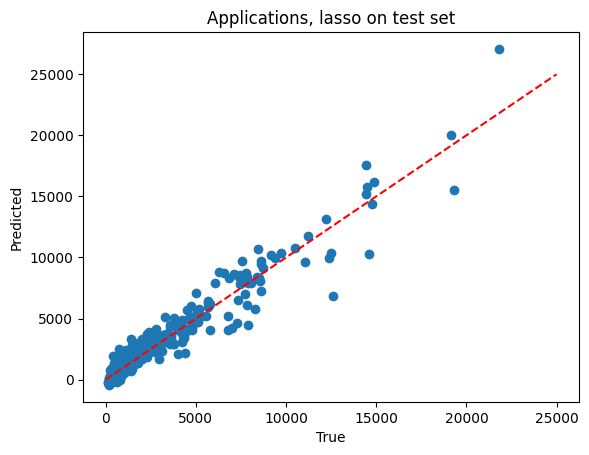

In [26]:
pred = lassocv.predict(X_test)
plt.scatter(y_test,pred)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.plot([0, 25_000], [0, 25_000], '--', c='r')
plt.title('Applications, lasso on test set')
plt.show()

## OPTIONAL: Exercise 6.11

a) As suggested, I use the sklearn feature selector here.

In [27]:
Boston = pd.read_csv('./data/islr_data/Boston.csv')

Boston.head()

y = Boston['crim']              # We want to predict `crim` with all other predictors
X = Boston.drop('crim', axis=1) # We want to use all predictors except `crim` for this

(n,p) = X.shape

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.5, random_state=13)

b)

In [28]:
from sklearn import linear_model
from sklearn.feature_selection import SequentialFeatureSelector

forward_sfs = {}
for i in range(p-1):
    reg_model = linear_model.LinearRegression()
    forward_sfs[i] = SequentialFeatureSelector(reg_model,
                                               n_features_to_select=i+1,
                                               direction='forward',
                                               scoring='neg_mean_squared_error',
                                               cv=10).fit(X_train,y_train)
    reg_model.fit(forward_sfs[i].transform(X_train),y_train)
    pred = reg_model.predict(forward_sfs[i].transform(X_test))
    print("MSE for {} features: {}".format(i+1,mean_squared_error(pred,y_test)))

MSE for 1 features: 48.476869993193624
MSE for 2 features: 46.082374276884906
MSE for 3 features: 45.758957009181636
MSE for 4 features: 44.74671078421922
MSE for 5 features: 44.3103405295373
MSE for 6 features: 44.167637898738235
MSE for 7 features: 43.86212991264093
MSE for 8 features: 43.86113664856567
MSE for 9 features: 43.82273301384072
MSE for 10 features: 43.78452599643279
MSE for 11 features: 43.784852256569124
MSE for 12 features: 43.97822434902432


Here, performance is best for a subset of 10 features (but note that I use the test set to find that, which we in general should not do to avoid overfitting!):

In [29]:
forward_sfs[9].get_support()

array([ True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True, False,  True])

Only the variables rm, age and lstat are deselected.

In [30]:
lambdas = 10**np.linspace(5,-5,50)

ridgecv = RidgeCV(alphas=lambdas, cv=10)
ridgecv.fit(X_train, y_train)
print("MSE on test set:", mean_squared_error(ridgecv.predict(X_test),y_test))
print("Non-zero coefficients:", np.sum(np.abs(ridgecv.coef_)>1e-16))

MSE on test set: 46.86076860779658
Non-zero coefficients: 13


In [31]:
print("10x CV:")
lassocv = LassoCV(alphas=lambdas, cv=10, max_iter=10000, random_state=42)
lassocv.fit(X_train, y_train)
print("MSE on test set:", mean_squared_error(lassocv.predict(X_test),y_test))
print("Non-zero coefficients:", np.sum(np.abs(lassocv.coef_)>1e-16))

10x CV:
MSE on test set: 45.18706361904113
Non-zero coefficients: 10


In [32]:
lassocv.coef_

array([-0.23803829,  0.77612509, -0.01298425,  0.        , -0.5893783 ,
        0.87206288,  0.        , -1.58204638,  4.59566728,  0.        ,
       -0.29498768,  0.06430785, -2.05693608])

b,c) Overall, most methods give similar results. Forward selection works slightly better (in terms of test set MSE). Both forward selection and the lasso select 10 features, but different ones. Like in earlier exercises, we can visualise how well we do, for example using the lasso - apparently, not very well:

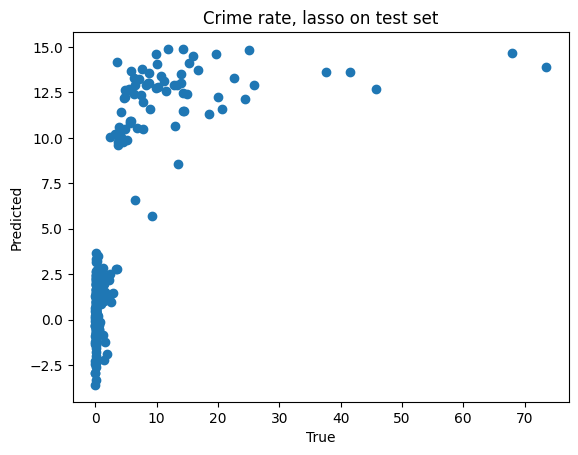

In [33]:
pred = lassocv.predict(X_test)
plt.scatter(y_test,pred)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Crime rate, lasso on test set')
plt.show()